# **XGBoost**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)  
pd.set_option('display.max_columns',35)
pd.set_option('display.width',1000) 

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [4]:
df.shape

(7043, 33)

In [5]:
# dropping the unneccesary columns

df.drop(['Churn Label','Churn Score', 'CLTV', 'Churn Reason'], axis =1, inplace = True)

In [6]:
df.shape

(7043, 29)

In [7]:
# dropping some more unneccesary columns

df.drop(['CustomerID','Count', 'Country', 'State', 'Lat Long'], axis =1, inplace = True)

In [8]:
df.shape

(7043, 24)

In [9]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [10]:
# as we can see the gap between the city names and in country name eg: Los Angeles or United States

# so below we are replacing that gap with underscore (_)

df['City'].replace(' ','_', regex = True, inplace = True)

# we are doing this because we can't draw a tree if we have whitespacess in the values (we can do Xgboost for tht it's not a problem)

In [11]:
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [12]:
df.columns

Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'], dtype='object')

In [13]:
# same replacing whitespaces from the column names

df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value'], dtype='object')

## Handling Missing data

In [15]:
df.isnull().sum()

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [16]:
df.head(2)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [18]:
# As we can see for thr Total_Charges column has float values but the datatype is object 
# so converting that column to float

# df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

# If we do this we get error because we have empty space in the column values

In [19]:
# replacimg the empty spaces 

len(df.loc[df['Total_Charges'] == ' '])

11

In [20]:
# df.loc[df['Total_Charges'] == ' ']

In [21]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [22]:
len(df.loc[df['Total_Charges'] == ' '])

0

In [23]:
# now converting to numeric
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [24]:
## Replaceing the whitespaces or gap with underscore(_), here we are not specifying the column we are doing for complete dataset

In [25]:
df.replace(' ', '_', regex = True, inplace = True)

In [26]:
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


## Split the data into Dependent and independent variables

In [27]:
X = df.drop('Churn_Value', axis = 1).copy()

In [28]:
y = df['Churn_Value'].copy()

## Converting ordinal or categorical data into numeric data (one hot encoding)

In [29]:
pd.get_dummies(X, columns = ['Payment_Method']).head(2)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0


In [30]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                         'Gender',
                                         'Senior_Citizen',
                                         'Partner',
                                         'Dependents',
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'])

In [31]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,...,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


# Building an model

In [32]:
y.value_counts()

0    5174
1    1869
Name: Churn_Value, dtype: int64

In [33]:
# Here we can balance the data or other method is using stratify

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [35]:
y_train.value_counts()

0    3880
1    1402
Name: Churn_Value, dtype: int64

In [36]:
y_test.value_counts()

0    1294
1     467
Name: Churn_Value, dtype: int64

In [37]:
# using statify gives better results that using test_size = 0.2

In [38]:
import xgboost
clf_xgb = xgboost.XGBClassifier(objective = 'binary:logistic', missing = 1, seed = 42) 
clf_xgb.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', eval_set = [(X_test, y_test)])

# early_stopping_rounds is used to improve the acuracy ( like during the building of trees if prediction doesn't increase then it will build 10 more tress)
# eval_set is used because model is training on the training dataset but it is evaluating how many trees to buid using testing dataset

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65311
[4]	validation_0-aucpr:0.65514
[5]	validation_0-aucpr:0.65397
[6]	validation_0-aucpr:0.64818
[7]	validation_0-aucpr:0.64908
[8]	validation_0-aucpr:0.65365
[9]	validation_0-aucpr:0.65074
[10]	validation_0-aucpr:0.65011
[11]	validation_0-aucpr:0.65012
[12]	validation_0-aucpr:0.65120
[13]	validation_0-aucpr:0.65151
[14]	validation_0-aucpr:0.65163


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

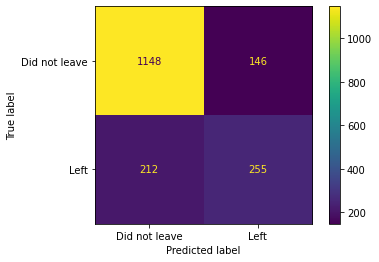

In [39]:
## checking the accuracy score 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_xgb, X_test, y_test, values_format = 'd', display_labels = ['Did not leave', 'Left'])

* In the above matrix we can see that out of 1148 + 146 = 1294 , people did not leave is 1148 (88%) were correctly classified.
* And we can also see that out of 212 + 255 = 467 , people left is 255 (54%) were correctly classified.

## Drawing this xgb classifier model Tree

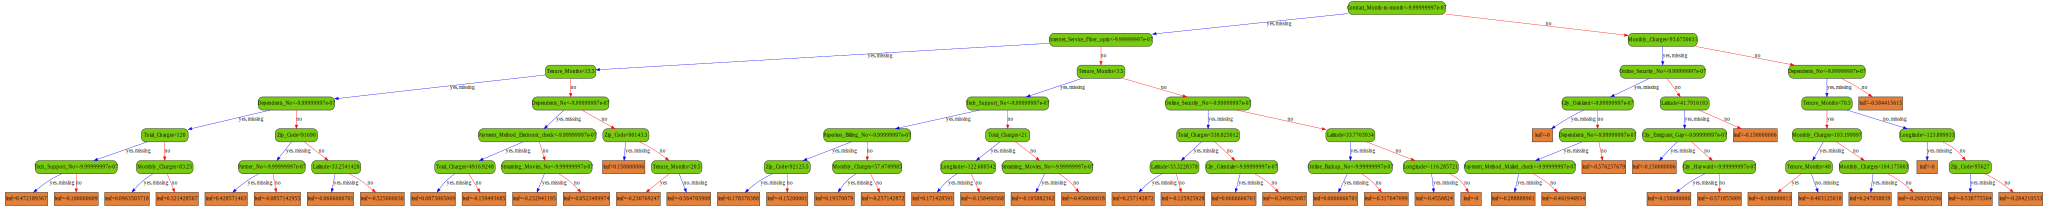

In [40]:
node_params = {'shape' : 'box',
               'style' : 'filled, rounded',
               'fillcolor' : '#78cbe'}

leaf_params = {'shape' : 'box',
               'style' : 'filled',
               'fillcolor' : '#e48038'}


xgboost.to_graphviz(clf_xgb, num_trees = 0, size = "10,10",
                    condition_node_params = node_params,
                    leaf_node_params = leaf_params)

# Optimize parameters using Cross validation and GridSearch Cv()

In [41]:
param_grid = {
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma' : [0, 0.25, 1.0],
    'reg_lambda' : [0, 1.0, 10.0],
    'scale_pos_weight' : [1, 3, 5]
}

To speed up the cross validation and prevent the overfitting we use random_subset = 0.9 i.e 90% of data and use only random_subset of features i.e 50% per tree

In [42]:
from sklearn.model_selection import GridSearchCV
optimal_parms = GridSearchCV(
                estimator = xgboost.XGBClassifier(objective = 'binary:logistic', seed = 42, subsample = 0.9, colsample_bytree = 0.5),
                param_grid = param_grid,
                scoring = 'roc_auc',
                verbose = 0,
                n_jobs = 10,
                cv = 3
)

In [43]:
optimal_parms.fit(X_train, y_train)

[09:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_metho

In [44]:
optimal_parms.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
optimal_parms.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

In [46]:
best_xgb_classifier_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
best_xgb_classifier_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.61356
[1]	validation_0-aucpr:0.63145
[2]	validation_0-aucpr:0.64175
[3]	validation_0-aucpr:0.64676
[4]	validation_0-aucpr:0.65241
[5]	validation_0-aucpr:0.65560
[6]	validation_0-aucpr:0.65383
[7]	validation_0-aucpr:0.65121
[8]	validation_0-aucpr:0.65329
[9]	validation_0-aucpr:0.65315
[10]	validation_0-aucpr:0.65380
[11]	validation_0-aucpr:0.65436
[12]	validation_0-aucpr:0.65503
[13]	validation_0-aucpr:0.65450
[14]	validation_0-aucpr:0.65740
[15]	validation_0-aucpr:0.65647
[16]	validation_0-aucpr:0.65673
[17]	validation_0-aucpr:0.65824
[18]	validation_0-aucpr:0.65648
[19]	validation_0-aucpr:0.66099
[20]	validation_0-aucpr:0.66263
[21]	validation_0-aucpr:0.65784
[22]	validation_0-aucpr:0.65814
[23]	validation_0-aucpr:0.65698
[24]	validation_0-aucpr:0.66042
[25]	validation_0-aucpr:0.66078
[26]	validation_0-aucpr:0.66012
[27]	validation_0-aucpr:0.66007
[28]	validation_0-aucpr:0.66124
[29]	validation_0-aucpr:0.66099
[30]	validation_0-aucpr:0.66255


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

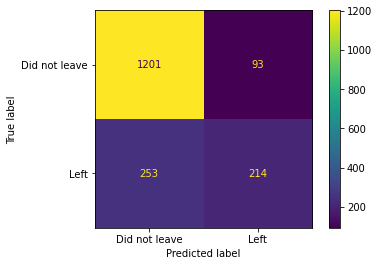

In [48]:
## checking the accuracy score 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_xgb_classifier_model, X_test, y_test, values_format = 'd', display_labels = ['Did not leave', 'Left'])

* In the above matrix we can see that out of 1201 + 93 = 1294 , people did not leave is 1201 (93%) were correctly classified.
* And we can also see that out of 253 + 214 = 467 , people left is 255 (46%) were correctly classified.

## Drawing this best xgb classifier model Tree

In [49]:
best_xgb_classifier_model = xgboost.XGBClassifier()
best_xgb_classifier_model.fit(X_train, y_train)

[09:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
bst = best_xgb_classifier_model.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))

weight:  {'Contract_Month-to-month': 24, 'Monthly_Charges': 315, 'Online_Security_No': 30, 'Latitude': 297, 'City_Emigrant_Gap': 1, 'City_Hayward': 3, 'City_Oakland': 5, 'Dependents_No': 36, 'Payment_Method_Mailed_check': 14, 'Tenure_Months': 198, 'Longitude': 259, 'Zip_Code': 277, 'Internet_Service_Fiber_optic': 5, 'Tech_Support_No': 25, 'Total_Charges': 339, 'Streaming_Movies_No': 16, 'Paperless_Billing_No': 33, 'Online_Backup_No': 27, 'City_Glendale': 2, 'Partner_No': 26, 'Payment_Method_Electronic_check': 31, 'City_San_Jose': 9, 'Contract_One_year': 11, 'Senior_Citizen_No': 18, 'Gender_Female': 36, 'Online_Security_Yes': 8, 'Device_Protection_Yes': 13, 'Multiple_Lines_No': 22, 'Streaming_Movies_Yes': 11, 'Streaming_TV_Yes': 8, 'Payment_Method_Bank_transfer_(automatic)': 12, 'Internet_Service_DSL': 7, 'Streaming_TV_No': 20, 'Contract_Two_year': 5, 'Phone_Service_No': 9, 'Payment_Method_Credit_card_(automatic)': 16, 'Multiple_Lines_Yes': 14, 'City_Santa_Rosa': 5, 'City_Bakersfield': 

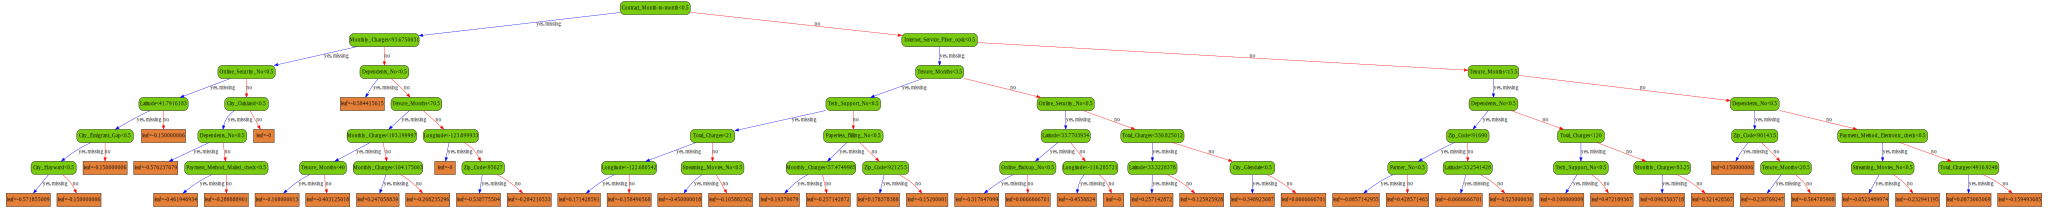

In [51]:
node_params = {'shape' : 'box',
               'style' : 'filled, rounded',
               'fillcolor' : '#78cbe'}

leaf_params = {'shape' : 'box',
               'style' : 'filled',
               'fillcolor' : '#e48038'}


xgboost.to_graphviz(best_xgb_classifier_model, num_trees = 0, size = "10,10",
                    condition_node_params = node_params,
                    leaf_node_params = leaf_params)

In [52]:
# if you want to save that figure in pdf use the below code

tree_fig = xgboost.to_graphviz(clf_xgb, num_tress = 0, size = '10,10',
                    condition_node_params = node_params,
                    leaf_node_params = leaf_params)

tree_fig.view(filename = 'xgboost_tree_diagram')

'xgboost_tree_diagram.pdf'